# Visualizing World Cup Data With Seaborn

For this project you will be exploring data from the <a href="https://en.wikipedia.org/wiki/FIFA_World_Cup">Fifa World Cup</a> from 1930-2014 to analyze trends and discover insights about the world's game, fútbol!

This Fifa World Cup data is from <a href="https://www.kaggle.com/abecklas/fifa-world-cup">Kaggle</a>. Kaggle is a platform for data science competitions that hosts many datasets online.

Using Seaborn you will create a series of plots that explore aggregates and distribution across the goals scored in World Cup games.

## A little primer on the Fifa World Cup:

The FIFA World Cup, or simply the World Cup, is an international fútbol competition where 32 countries qualify to send teams made up of the best players from that nation to compete against each other for the World Cup championship.

The World Cup championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

The current format of the tournament involves 32 teams competing for the title at venues within the host nation over a period of one month.

## A note on datasets

You may notice some typographical errors in the data as you view it. This is a large dataset, and errors are often a part of the process of generating large datasets. None of the errors should affect any of the steps of this project.

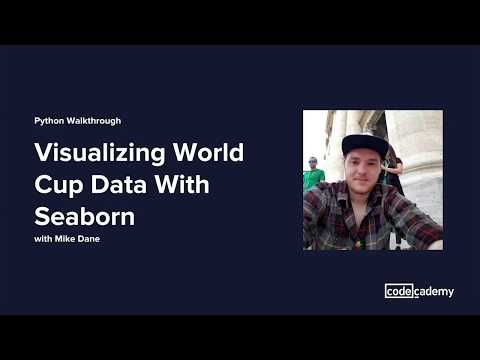

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('P4fxCeeKykQ', width = 800, height = 500)

***

1. Import the modules that you will be using in this project:

    - `from matplotlib import pyplot as plt`
    - `import pandas as pd`
    - `import seaborn as sns`

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

2. Inspect the raw CSV files that you will be using in this project by selecting them in the file navigator.

3. Load `WorldCupMatches.csv` into a DataFrame called `df`. This will allow you to eventually plot the DataFrame with Seaborn.

In [3]:
df = pd.read_csv('WorldCupMatches.csv')

4. It is usually a good idea to check any new DataFrame to make sure the results are as expected.

    Inspect the DataFrame using `.head()`.

In [4]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


5. The data in `WorldCupMatches.csv` has the goals scored in each match broken up by goals for the home team and goals for the away team. We want to visualize the total number of goals scored in each match.

    Create a new column in `df` named `Total Goals`, and set it equal to the sum of the columns `Home Team Goals` and `Away Team Goals`.

    Print the results of `df.head()` to confirm your new column.

In [5]:
df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


6. You are going to create a bar chart visualizing how many goals were scored each year the World Cup was held between 1930-2014.

    Set the style of your plot to be `whitegrid`. This will add gridlines to the plot which will make it easier to read the visualization.

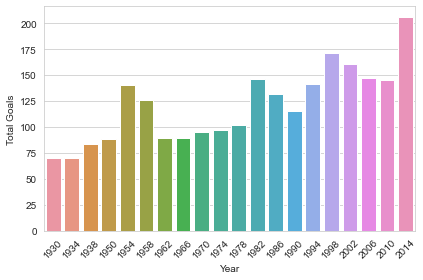

In [6]:
sns.set_style('whitegrid')
sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    estimator=sum,
    ci=None
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7. To make the text in your visualization bigger and easier to read, set the context to be `"poster"`.

If you would like to further adjust the font size of your plot, you can pass `sns.set_context()` a second optional argument using the keyword `font_scale`.

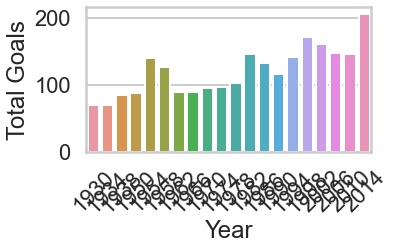

In [7]:
sns.set_style('whitegrid')
sns.set_context("poster")
sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    estimator=sum,
    ci=None
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Create a figure and axes for your plot using the syntax:

    `f, ax = plt.subplots()`

    Inside of `plt.subplots()`, set the size of the figure to be 12 inches wide and 7 inches tall.

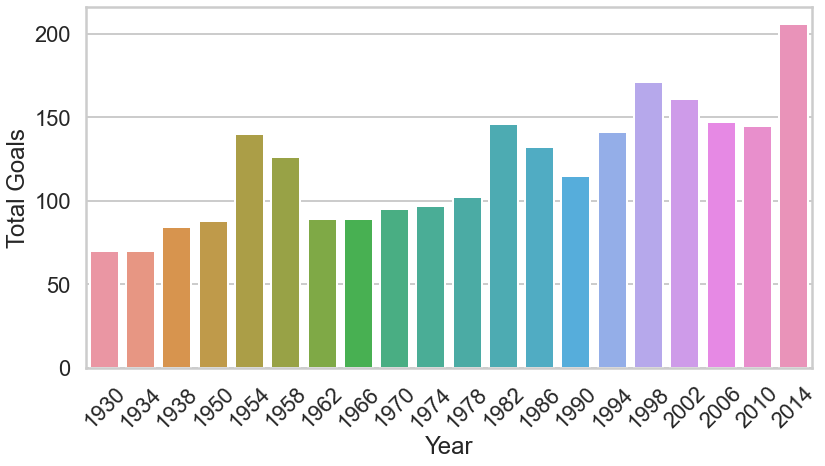

In [8]:
sns.set_style('whitegrid')
sns.set_context("poster")
f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    estimator=sum,
    ci=None
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9. Using the data in `df` and the syntax:

    `ax = sns.barplot()`

    visualize the columns `Year` and `Total Goals` as a bar chart.

    `Year` should be on the x-axis, and `Total Goals` should be on the y-axis.

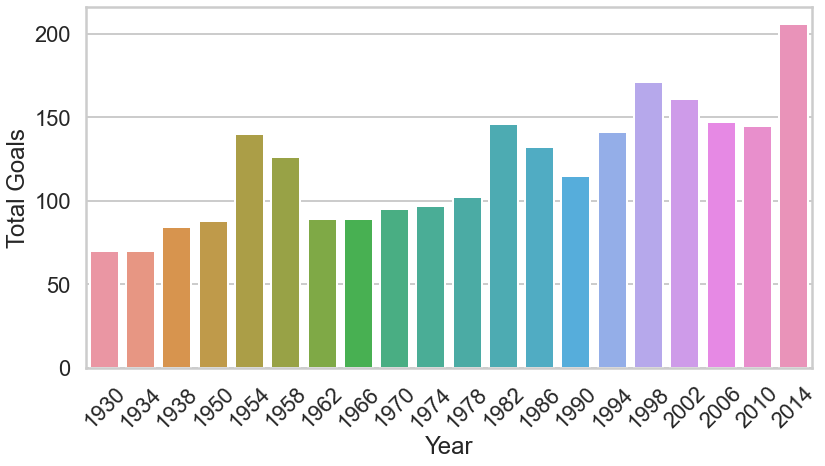

In [9]:
sns.set_style('whitegrid')
sns.set_context("poster")
f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    estimator=sum,
    ci=None
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10. Render your bar chart so you can see it.

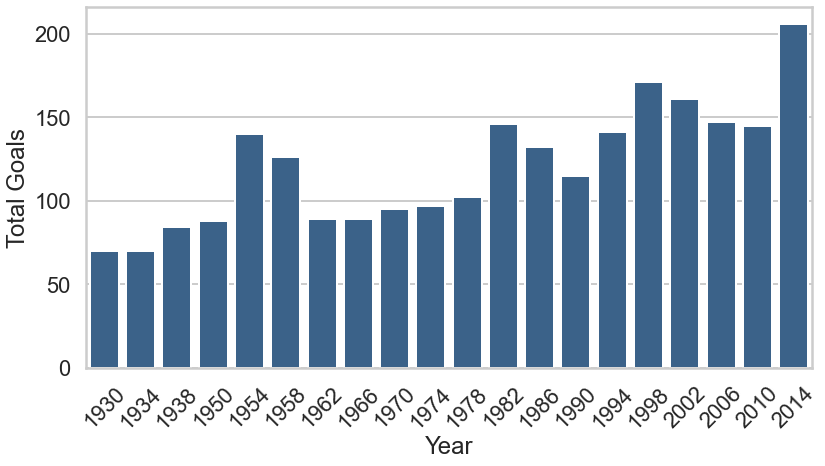

In [10]:
sns.set_style('whitegrid')
sns.set_context("poster")
f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    estimator=sum,
    color='#2E6296',
    ci=None
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11. Effective visualizations include a clear title.

    Give your bar chart a meaningful title using `ax.set_title()`.

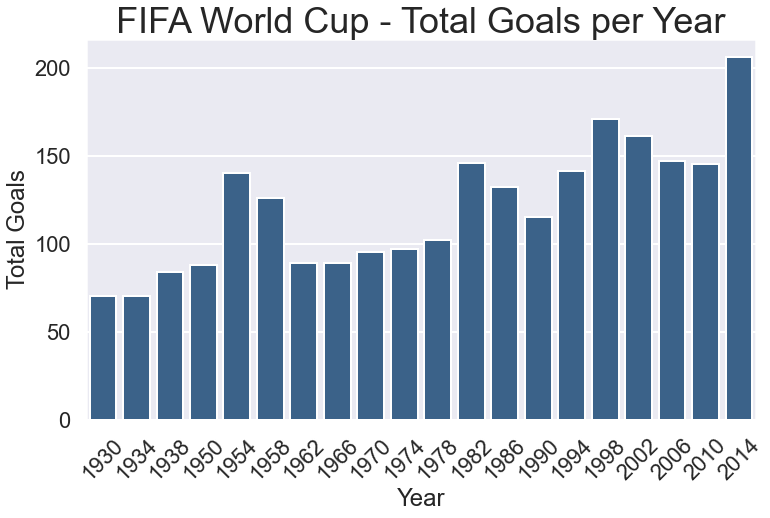

In [11]:
sns.set_style('darkgrid')
sns.set_context("poster")
f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    estimator=sum,
    color='#2E6296',
    ci=None
)
ax.set_title('FIFA World Cup - Total Goals per Year', fontsize=36)
plt.xticks(rotation=45)
plt.show()

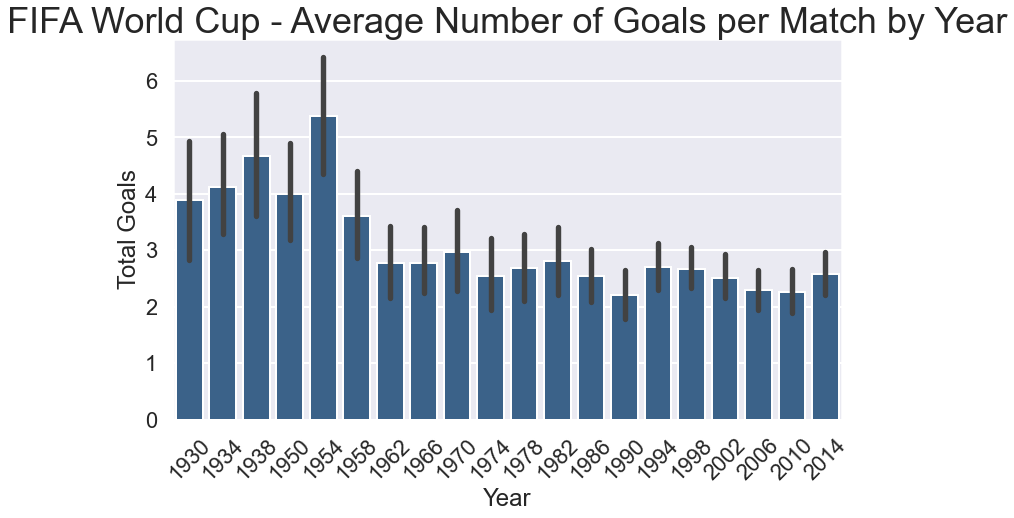

In [12]:
sns.set_style('darkgrid')
sns.set_context("poster")
f, ax = plt.subplots(figsize=(12,7))
ax = sns.barplot(
    data=df,
    x='Year',
    y='Total Goals',
    color='#2E6296'
)
ax.set_title('FIFA World Cup - Average Number of Goals per Match by Year', fontsize=36)
plt.xticks(rotation=45)
plt.show()

12. Now you are going to create a box plot so you can visualize the distribution of the goals data instead of just the average with a bar chart.

    Load `goals.csv` into a DataFrame called `df_goals`, and take a quick look at the DataFrame using `.head()`.

In [13]:
df_goals = pd.read_csv('goals.csv')
df_goals.head()

,goals,home/away,year
0,4,home,1930
1,3,home,1930
2,2,home,1930
3,3,home,1930
4,1,home,1930


13. Experimenting with different contexts and font scales can help you decide on the best context and font scale for the particular visualization.

    Try setting the context of the plot to be `notebook` and the `font_scale` to be `1.25`.

In [14]:
sns.set_context('notebook', font_scale=1.25)

14. Create a figure for your second plot.

    Set the variables `f`, `ax2` and instantiate a figure that is `12` inches wide and `7` inches tall.

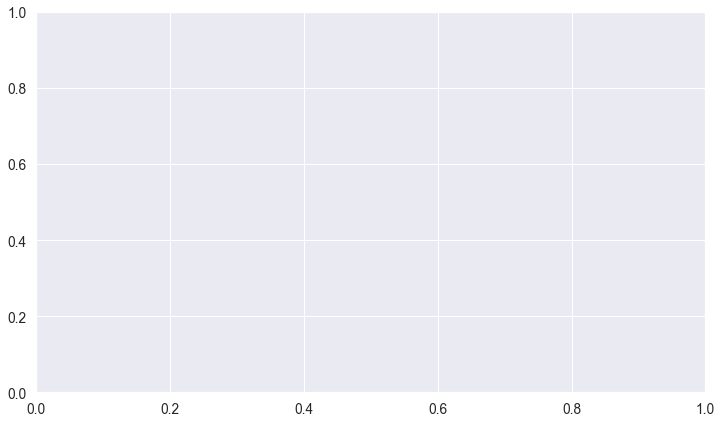

In [15]:
f, ax2 = plt.subplots(figsize=(12,7))

15. Set `ax2` equal to a box plot with the color palette `Spectral` that visualizes the data in the DataFrame `df_goals` with the column `year` on the x-axis and `goals` on the y-axis.

16. Give your box plot a meaningful and clear title.

17. Render your box plot so you can see it.

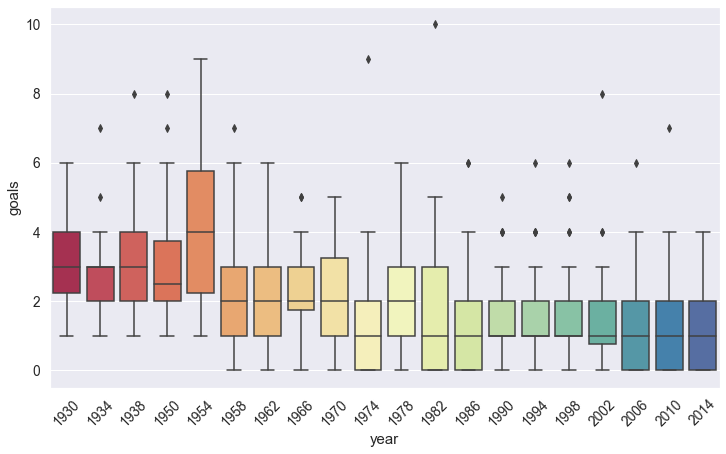

In [16]:
sns.set_context('notebook', font_scale=1.25)

f, ax2 = plt.subplots(figsize=(12,7))
ax2 = sns.boxplot(
    data=df_goals,
    x='year',
    y='goals',
    palette='Spectral'
)
# ax.set_title('FIFA World Cup - Average Number of Goals per Match by Year', fontsize=36)
plt.xticks(rotation=45)
plt.show()

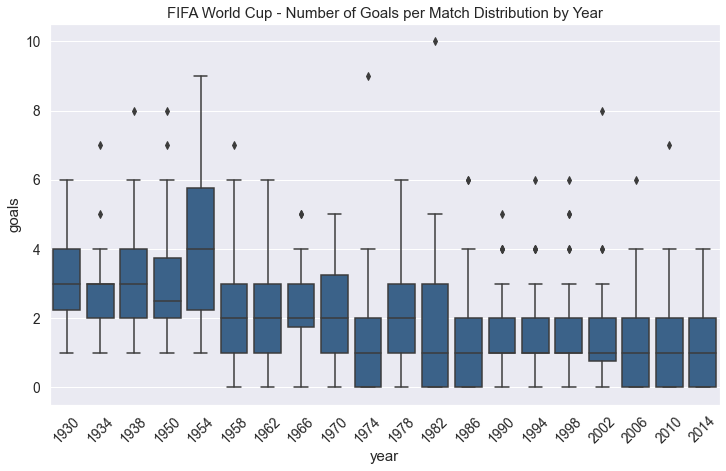

In [18]:
sns.set_context('notebook', font_scale=1.25)
f, ax2 = plt.subplots(figsize=(12,7))
ax2 = sns.boxplot(
    data=df_goals,
    x='year',
    y='goals',
    color='#2E6296'
)
ax2.set_title('FIFA World Cup - Number of Goals per Match Distribution by Year')
plt.xticks(rotation=45)
plt.show()

18. Congratiulations you are done! Feel free to continue iterating on your plots in this workspace.

    You can also explore more datasets at the Kaggle website.